In [1]:
!pip install arviz
!pip install pymc3
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from scipy import stats
from scipy.special import expit as logistic

     |████████████████████████████████| 1.6 MB 513 kB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 55.6 MB/s eta 0:00:01
     |████████████████████████████████| 870 kB 37.6 MB/s eta 0:00:01
     |████████████████████████████████| 239 kB 56.8 MB/s eta 0:00:01
     |████████████████████████████████| 872 kB 519 kB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 24.8 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 35.4 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 77 kB 2.9 MB/s  eta 0:00:01
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=176fedc691fbe4b2afdc05cc01e7595313a1b171f4b74f7da46dc07e9988e1d4
  Stored in directory: /root/.cache/pip/wheels/04/22/4d/832878ba2fe9ea3543f0189b9288a78e4aa4e0afc851a6890c
Successfully built theano-pymc


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89
az.rcParams["stats.ic_scale"] = "deviance"
az.rcParams["stats.information_criterion"] = "waic"

In [3]:
az.rcParams.keys()

KeysView(RcParams({'data.http_protocol': 'https',
          'data.index_origin': 0,
          'data.load': 'lazy',
          'data.log_likelihood': True,
          'data.metagroups': {'latent_vars': ('posterior', 'prior'),
                              'observed_vars': ('posterior_predictive',
                                                'observed_data',
                                                'prior_predictive'),
                              'posterior_groups': ('posterior',
                                                   'posterior_predictive',
                                                   'sample_stats',
                                                   'log_likelihood'),
                              'posterior_groups_warmup': ('_warmup_posterior',
                                                          '_warmup_posterior_predictive',
                                                          '_warmup_sample_stats'),
                              'prior_groups

#### Code 13.1

EF

In [1233]:
import os
os.chdir('/ECT/TMS')
clin = pd.read_csv("./NBACK/clin_2022MAY.csv", sep=",")
clin

,Unnamed: 0,id,madrs,time,event,sess
0,7,2,37.0,1,Baseline,22847
1,8,2,35.0,2,Week 1,22847
2,9,2,30.0,3,Week 2,22847
3,10,2,29.0,4,Week 3,22847
4,11,2,24.0,5,Week 4,22847
...,...,...,...,...,...,...
241,320,54,35.0,2,Week 1,23802
242,321,54,37.0,3,Week 2,23802
243,322,54,NaN,4,Week 3,23802
244,323,54,NaN,5,Week 4,23802


Delta Volume

In [1234]:

clinuse = clin.iloc[np.where(clin.madrs.notnull())].copy()
clinuse

42

,Unnamed: 0,id,madrs,time,event,sess
0,7,2,37.0,1,Baseline,22847
1,8,2,35.0,2,Week 1,22847
2,9,2,30.0,3,Week 2,22847
3,10,2,29.0,4,Week 3,22847
4,11,2,24.0,5,Week 4,22847
...,...,...,...,...,...,...
238,317,53,0.0,5,Week 4,23760
239,318,53,0.0,6,Week 5,23760
240,319,54,34.0,1,Baseline,23802
241,320,54,35.0,2,Week 1,23802


In [9]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%qtconsole

In [1236]:
Nsubj = len(np.unique(clinuse.id))
code = pd.DataFrame({'id':list(np.unique(clinuse.id)), 'sbj':list(range(Nsubj))})
clinuse['sbj'] = np.zeros(clinuse.shape[0]).astype(int)

for i in range(Nsubj):
    indx = np.where(clinuse.id == code.id[i])
    clinuse.sbj.iloc[indx[0]] = code.sbj[i]
clinuse


/tmp/ipykernel_1544/1731158421.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinuse.sbj.iloc[indx[0]] = code.sbj[i]


,Unnamed: 0,id,madrs,time,event,sess,sbj
0,7,2,37.0,1,Baseline,22847,0
1,8,2,35.0,2,Week 1,22847,0
2,9,2,30.0,3,Week 2,22847,0
3,10,2,29.0,4,Week 3,22847,0
4,11,2,24.0,5,Week 4,22847,0
...,...,...,...,...,...,...,...
238,317,53,0.0,5,Week 4,23760,39
239,318,53,0.0,6,Week 5,23760,39
240,319,54,34.0,1,Baseline,23802,40
241,320,54,35.0,2,Week 1,23802,40


,Unnamed: 0,id,madrs,time,event,sess,sbj
0,1,1,38.0,1,Baseline,22846,0
6,7,2,37.0,1,Baseline,22847,1
7,8,2,35.0,2,Week 1,22847,1
8,9,2,30.0,3,Week 2,22847,1
9,10,2,29.0,4,Week 3,22847,1
...,...,...,...,...,...,...,...
244,317,53,0.0,5,Week 4,23760,40
245,318,53,0.0,6,Week 5,23760,40
246,319,54,34.0,1,Baseline,23802,41
247,320,54,35.0,2,Week 1,23802,41


In [1357]:
sbj=clinuse.sbj.astype(int).values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#ef=ss.fit_transform(nmdata['Max_Intensity.1'].values.reshape(-1,1)).ravel()#remove extra bracket
#vol=ss.fit_transform(nmdata['dvol'].values.reshape(-1,1)).ravel() #remove extra bracket

with pm.Model() as c_1_1:
    # hyper-priors
    madrs=pm.Data('madrs', clinuse.madrs)
    time = pm.Data('time', clinuse.time)
    a_bar = pm.Normal("a_bar", 20.0, 15.0 )
    b_bar = pm.Normal("b_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_b = pm.Exponential("sigma_b", 1.0)
    sigma = pm.Exponential("sigma", 1.0)
    # adaptive priors
    a = pm.Normal("a", a_bar, sigma_a, shape=Nsubj)
    b = pm.Normal("b", b_bar, sigma_b, shape=Nsubj)
    mu = pm.Deterministic("mu", a[sbj] + b[sbj] * time)
    #mu = a[sbj] + b[sbj]*nmdata['Max_Intensity.1']
    M = pm.Normal("M", mu, sigma, observed=madrs)
    
    #trace_1_2 = pm.sample(tune=3000, target_accept=0.95, random_seed=RANDOM_SEED)
    #trace_clin_1_1 = pm.sample(random_seed=RANDOM_SEED)
    #idata_clin_1_1 = az.from_pymc3(trace_clin_1_1)

In [1358]:
with c_1_1:
    prior =  pm.sample_prior_predictive()
    trace = pm.sample(tune=3000, random_seed=RANDOM_SEED)
    ppc = pm.sample_posterior_predictive(trace)
    c_1_1_idata = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=ppc)

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma, sigma_b, sigma_a, b_bar, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 20 seconds.


In [1432]:
id = pd.DataFrame([cd[i][0], cd[i][1], c_1_1_idata['posterior']['b'].mean(dim=['chain','draw']).values[i]]).T
id.columns=['sess','sbj','slope']
id

,sess,sbj,slope
0,22847.0,0.0,-0.822532


In [1438]:
cd = np.unique(clinuse[['sess', 'sbj']], axis=0)
res = pd.DataFrame(columns=['sess','sbj','slope'])
#res.astype({'sess': 'int','sbj': 'int','slope': 'float'}).dtypes
for i in range(code.shape[0]):
    #print(i)
    ideg = pd.DataFrame([cd[i][0], cd[i][1], c_1_1_idata['posterior']['b'].mean(dim=['chain','draw']).values[i]]).T
    ideg.columns=['sess','sbj','slope']
    res = pd.concat([res, ideg], ignore_index=True)
res    
res.to_csv('/ECT/TMS/NBACK/clin-slope.csv')

,sess,sbj,slope
0,22847.0,0.0,-0.822532
1,22862.0,1.0,-0.955178
2,22875.0,3.0,-1.050201
3,22876.0,2.0,-0.660578
4,22886.0,4.0,-1.309123
...,...,...,...
36,23657.0,36.0,-1.062332
37,23712.0,35.0,-2.965105
38,23747.0,38.0,-0.857503
39,23760.0,39.0,-3.253172


In [1406]:
c_1_1_idata['posterior']['b'].mean(dim=['chain','draw']).values[i]

-0.8225324603143541

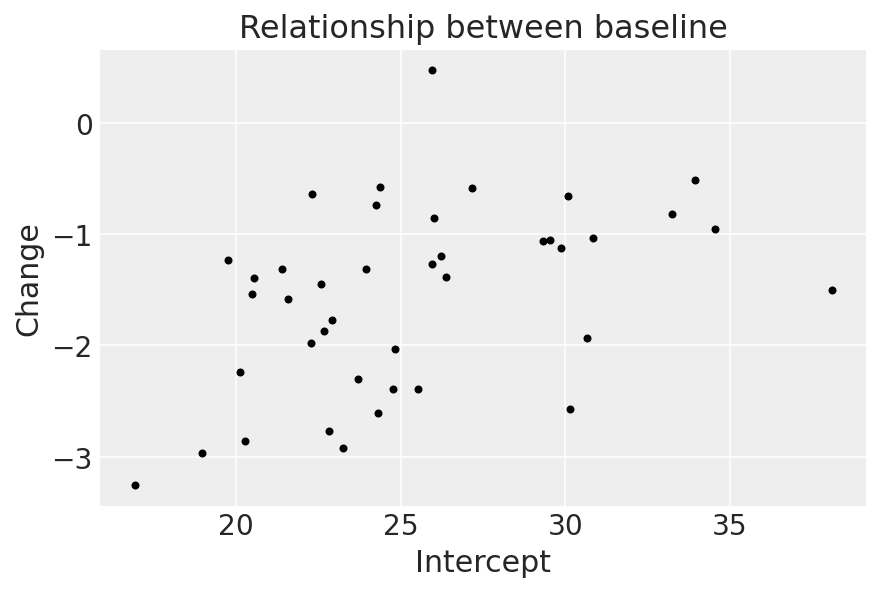

In [1391]:
c_1_1_idata['posterior']['b'].mean(dim=['chain','draw']).values
fig, ax = plt.subplots(1,1)
ax.plot(c_1_1_idata['posterior']['a'].mean(dim=['chain','draw']).values,c_1_1_idata['posterior']['b'].mean(dim=['chain','draw']).values, ".k")
#ax.plot(x_train1, ppc["observed"][::10].T, ".k", alpha=0.1)
#ax.plot(clinuse.time, prior["mu"][::10].T, ".k", alpha=0.1)
ax.set_xlabel("Intercept")
ax.set_ylabel("Change")
ax.set_title("Relationship between baseline and change");

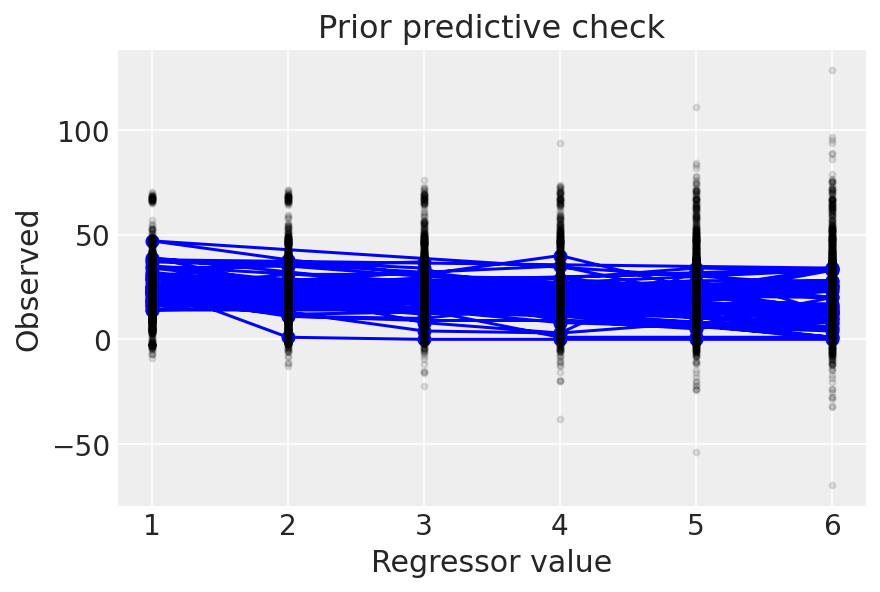

In [1392]:
fig, ax = plt.subplots(1,1)
ax.plot(clinuse.time, clinuse.madrs, "-ob")
#ax.plot(x_train1, ppc["observed"][::10].T, ".k", alpha=0.1)
ax.plot(clinuse.time, prior["mu"][::10].T, ".k", alpha=0.1)
ax.set_xlabel("Regressor value")
ax.set_ylabel("Observed")
ax.set_title("Prior predictive check");

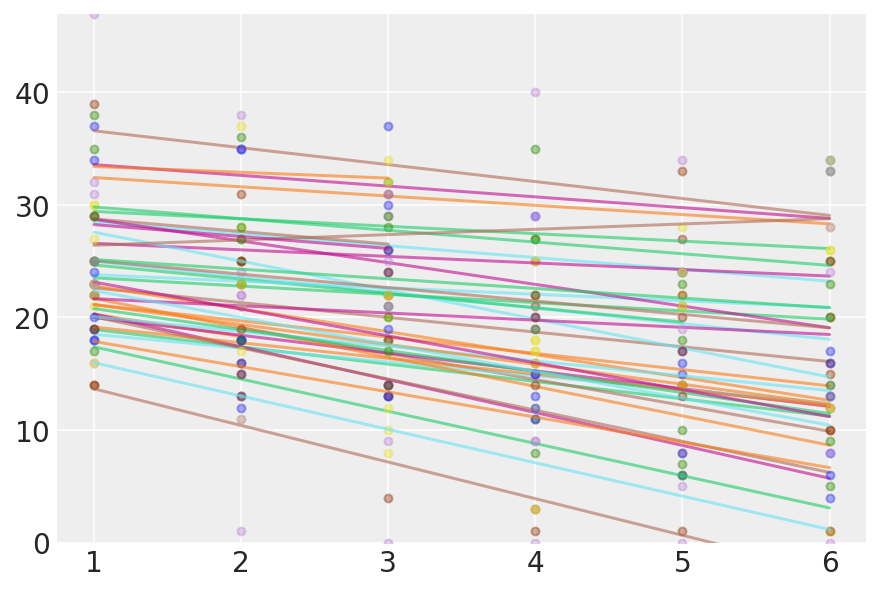

In [1361]:
_, ax = plt.subplots()

for i in range(41):
  
  mreg=i
  ix = np.where(clinuse.sbj==mreg)[0]
  if (ix.size!=0):
    ax.plot(clinuse.time.iloc[ix], clinuse.madrs.iloc[ix], "o", ms=4, alpha=0.4, label="Data") 
    #m, b = np.polyfit(clinuse.madrs.iloc[ix], ppc["M"].mean(0)[ix],1)
    ax.plot(clinuse.time.iloc[ix], c_1_1_idata['posterior']['b'][:,:,mreg].mean().values*clinuse.time.iloc[ix]+c_1_1_idata['posterior']['a'][:,:,mreg].mean().values, label="Mean outcome", alpha=0.6)
    #ax.set_title('Subject: ' + str(i))

    #plt.savefig('./Abbott/testfig_'+str(i)+'.pdf')
    #plt.show()
  #print(i)
plt.ylim([0,clinuse.madrs.values.max()])
plt.show();

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (318) in plot_posterior, generating only 40 plots
  warnings.warn(


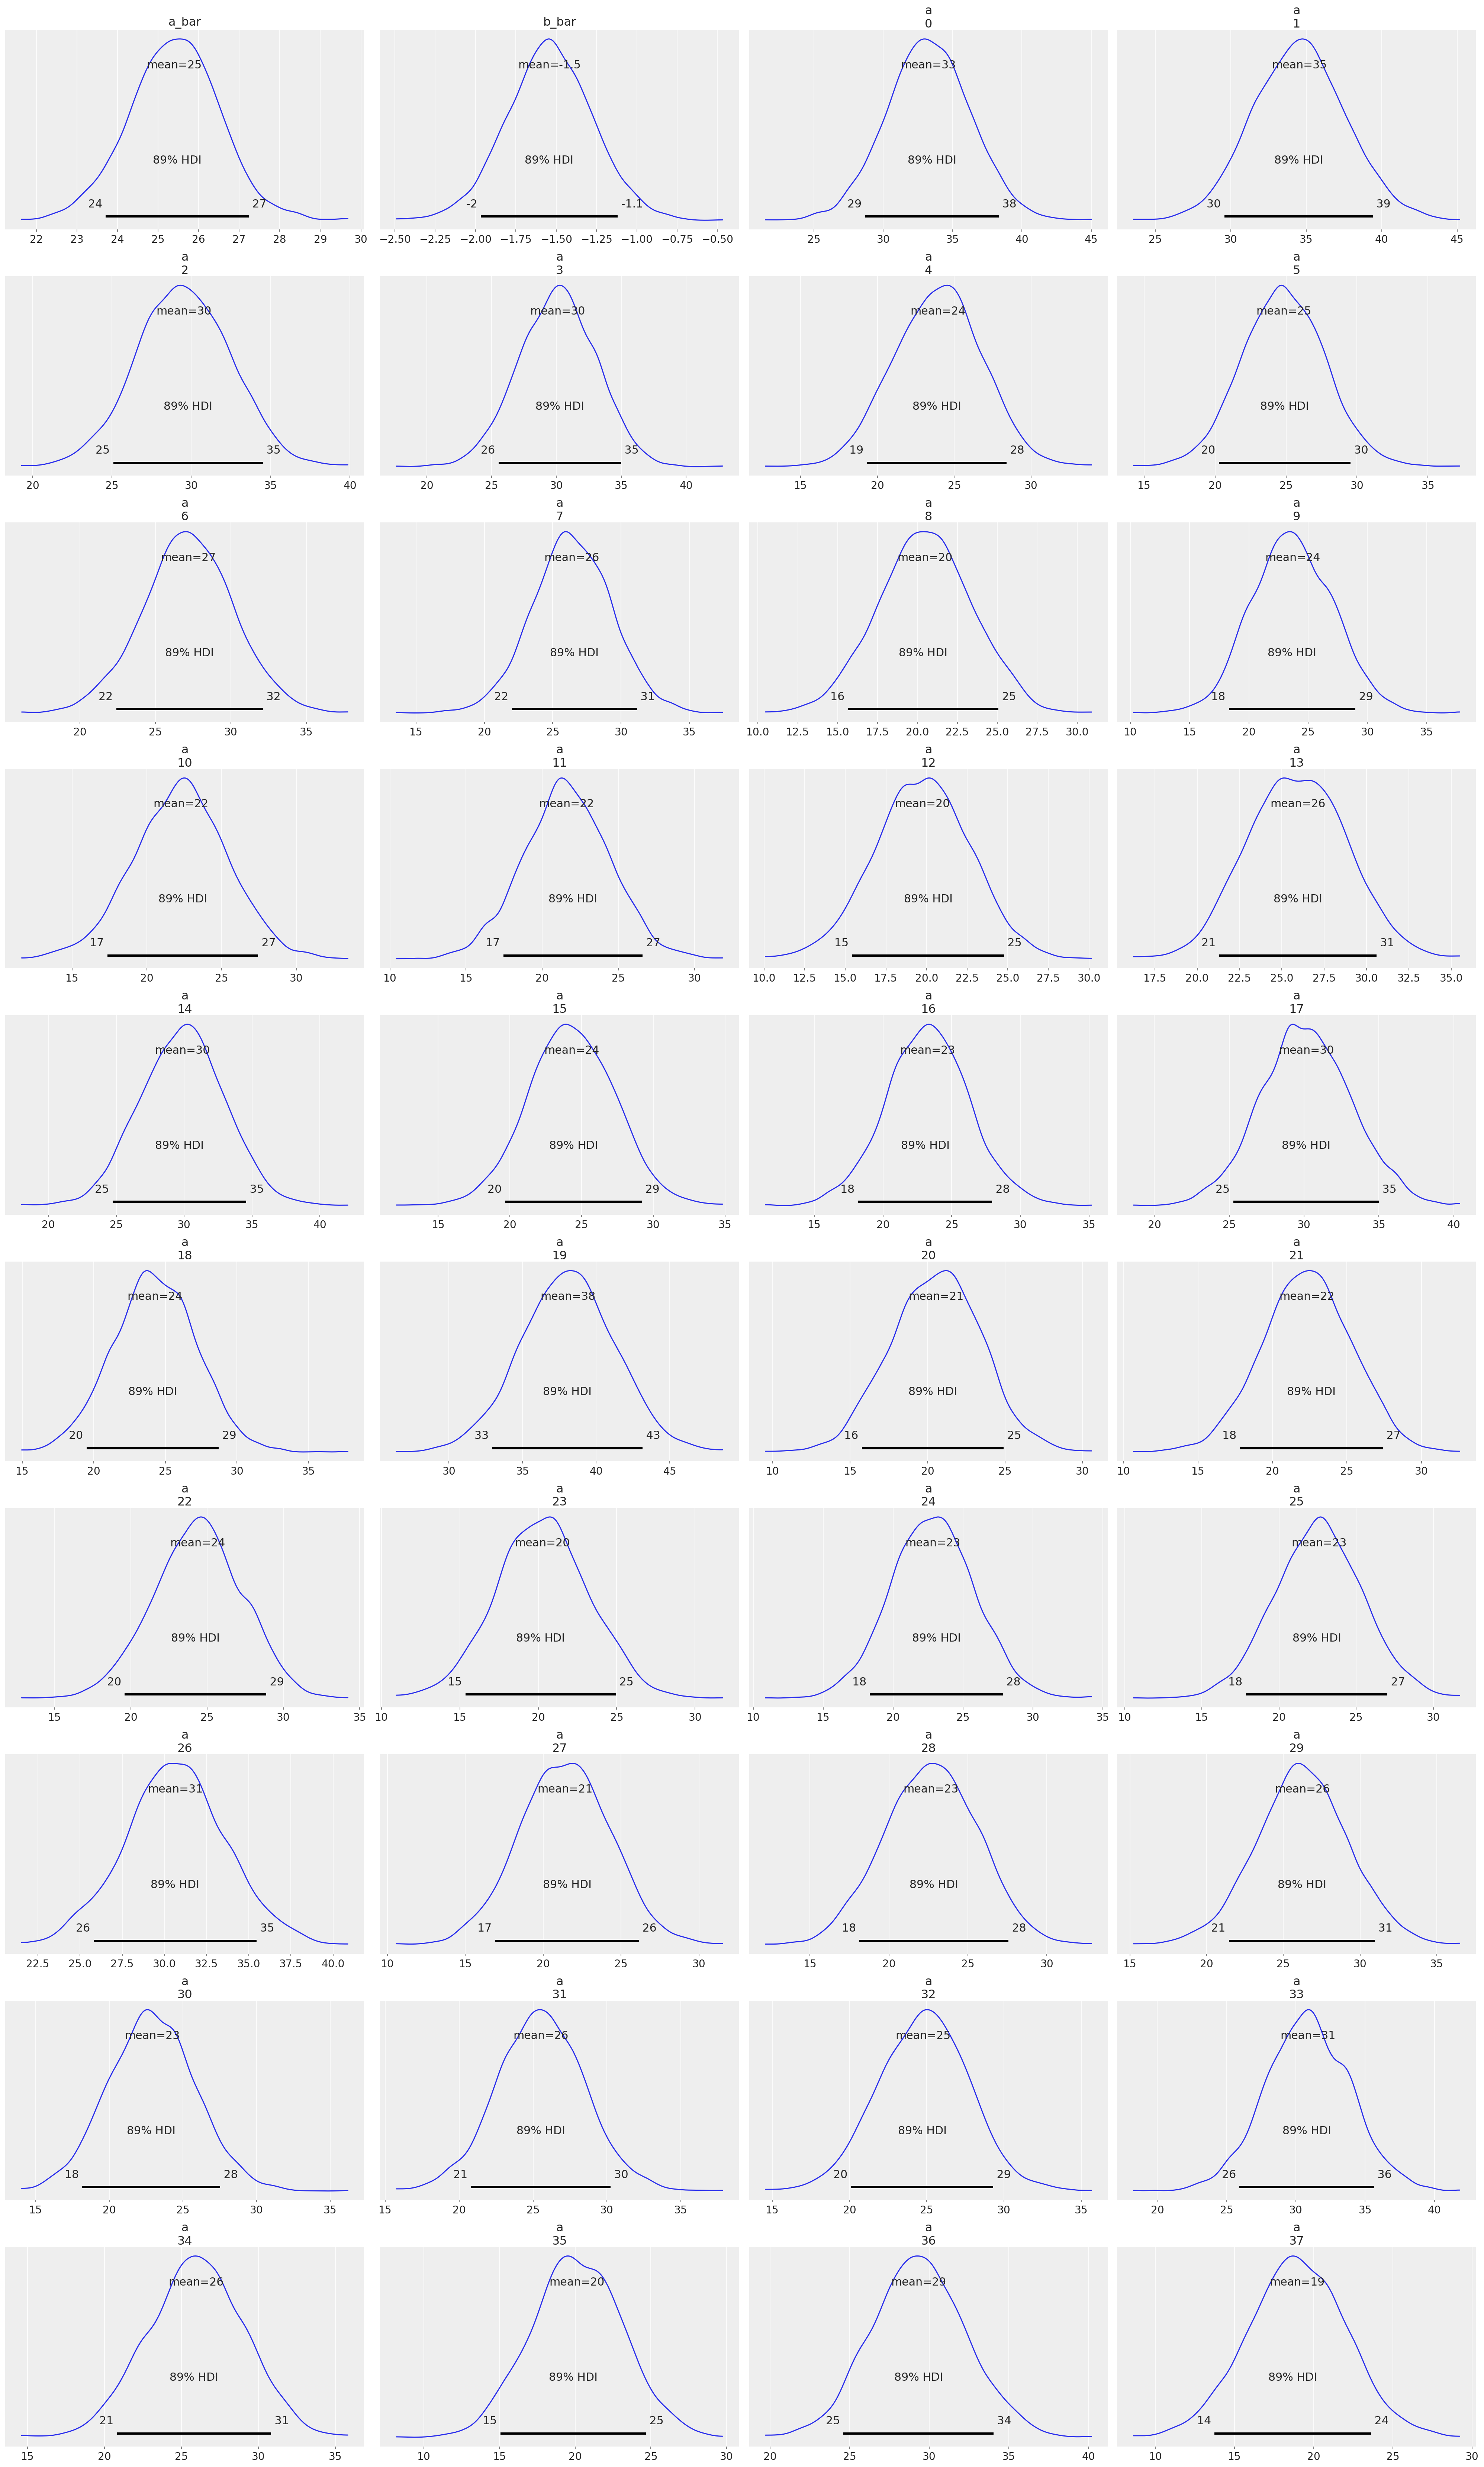

In [1395]:
az.plot_posterior(c_1_1_idata);